
# Test ROC curves
ROC curves hasn't always been explained that well, but a they are important and a lot of time is spent by the book using them as a mean of comparing classifiers.
In this notebook I'll try to clarify some concepts that has been illustrated during the course, with the hope of giving another point of view to better incorporate such concept. 

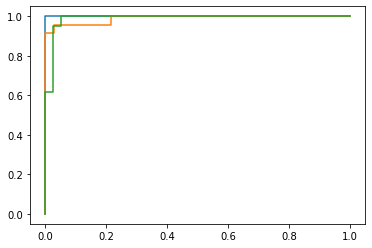

In [105]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

n_neighbors = 7


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)


# Compute the ROC plot using scores, without considering every possible threshold
# Parameters:
#   - scores: An array obtained from predict_proba with scores assigned to each class
#   - actual: An array containing the real class assigned to every instance
#   - positive_class: Index of the class consider positive (defaults to 0) 
# Return:
#   - An array containing the coordinates of points that represent the ROC curve
def scoring_roc(scores, actual, positive_class = 0):
    # Take only the column vector of scores corresponding to the positive
    # class, then order it in a decreasing order, by keeping only the permutation
    # of indexes that lead to the ordered sequence
    sorted_indexes = np.argsort(-scores[:, positive_class])

    # Compute positives and negatives
    # Positives are only considered if class = positive_class, all the remaining
    # ones are considered as negatives
    pos = sum(actual == positive_class)
    neg = actual.size - pos # Neg = |D| - Pos 
    
    # We can now proceed to compute the actual ROC plot
    # Let's start from the origin (0, 0)
    x, y = 0, 0
    roc_points = [[x, y]]

    # Consider the instances in a specific order
    for si in sorted_indexes:
        if actual[si] == positive_class:
            # Correctly classified, move up
            y += (1 / pos)
        else:
            # Incorrectly classified, move right 
            x += (1 / neg)
        roc_points.append([x, y])
    # Return points as a numpy array since its more convenient to use
    return np.array(roc_points)


# Print the ROC curve of each class
for positive_class in range(0, y_pred.shape[1]):
    roc_curve = scoring_roc(y_pred, y_test, postive_class)
    plt.plot(roc_curve[:,0], roc_curve[:, 1])